# AI ODYSSEY: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
#ENTER YOUR CODE HERE
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/new_dataset.csv')
df.head()

sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...

sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...

**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [ ]:
#ENTER YOUR CODE HERE
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment                                               text
0  Negative   @xnausikaax oh no! u order from? that's horrible
1  Negative  A great hard training weekend over. couple day...
2  Negative            Right, work Only 5 hours go I'm free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment                                               text
0  Negative   @xnausikaax oh no! u order from? that's horrible
1  Negative  A great hard training weekend over. couple day...
2  Negative            Right, work Only 5 hours go I'm free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Next, we'll remove some other info we dont need right now, like the handle names.**

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.strip()


df['text'] = df['text'].apply(clean_text)

df.head()

sentiment                                               text
0  Negative                  oh no u order from thats horrible
1  Negative  A great hard training weekend over couple days...
2  Negative              Right work Only 5 hours go Im free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

sentiment                                               text
0  Negative                 oh no u order from that s horrible
1  Negative  A great hard training weekend over couple days...
2  Negative             Right work Only 5 hours go I m free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [ ]:
#ENTER YOUR CODE HERE
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

df['text'] = df['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

df.head()


sentiment                                               text
0  Negative                    oh no u order from that horribl
1  Negative  a great hard train weekend over coupl day rest...
2  Negative               right work onli 5 hour go im free xd
3  Negative                               i crave japanes food
4  Negative  jean michel jarr concert tomorrow gotta work 7...

sentiment                                               text
0  Negative                     oh no u order from that s horr
1  Negative  a great hard training weekend over couple days...
2  Negative             right work only 5 hours go i m free xd
3  Negative                            i craving japanese food
4  Negative  jean michel jarre concert tomorrow gotta work ...

**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

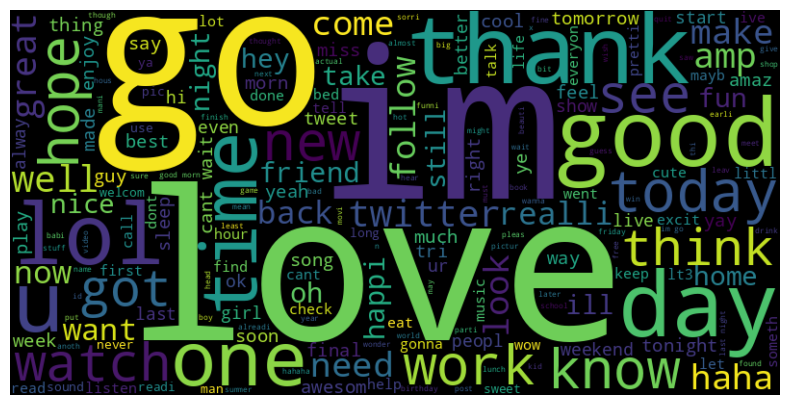

In [ ]:
#ENTER YOUR CODE HERE
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['text'])

def generate_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_word_cloud(positive_text)





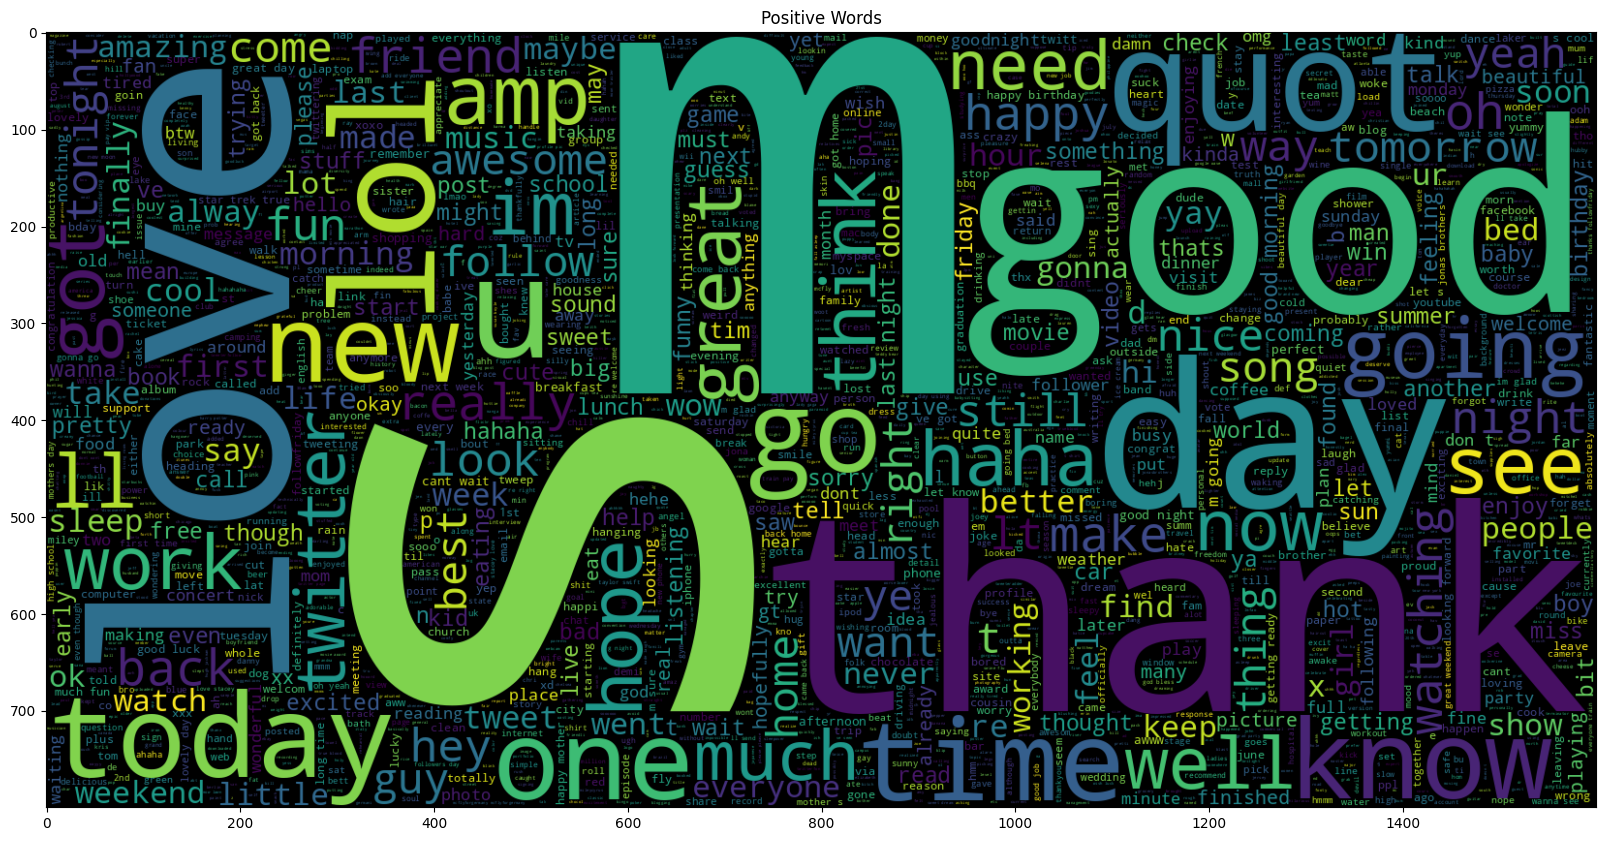

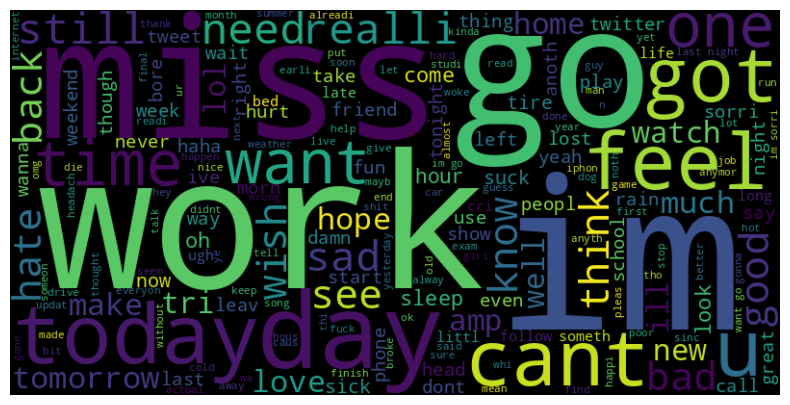

In [ ]:
#ENTER YOUR CODE HERE
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['text'])
generate_word_cloud(negative_text)

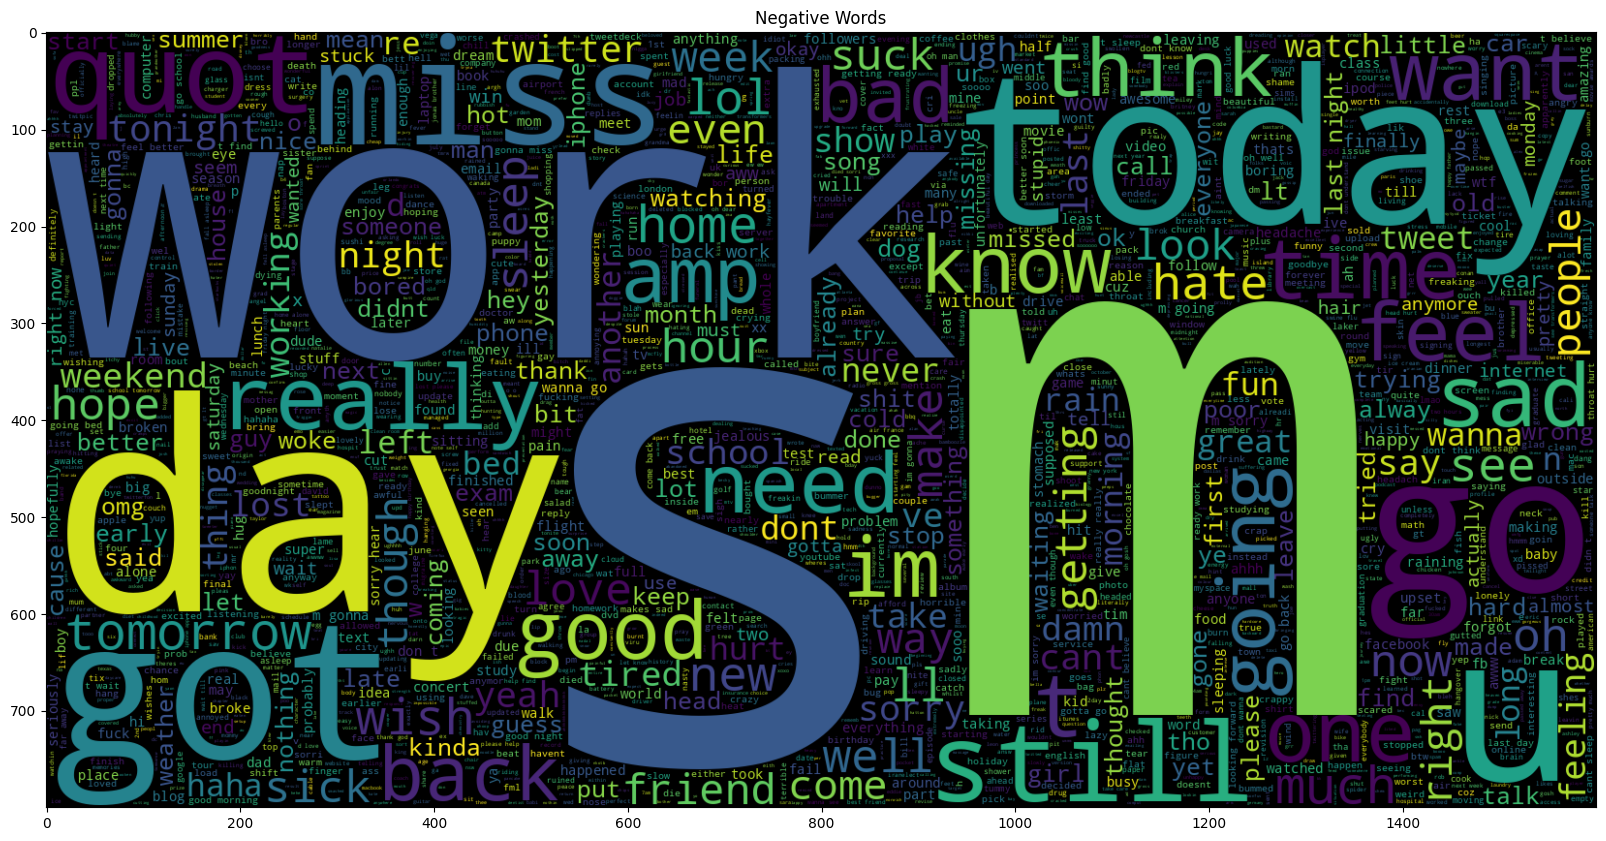

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [ ]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.1, random_state=42)

print("Training Set Size:", len(X_train))
print("Test Set Size:", len(X_test))

Training Set Size: 9000
Test Set Size: 1000


Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [ ]:
#ENTER YOUR CODE HERE
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print("Vocabulary Size :", len(tokenizer.word_index)+1)
vocab_size = len(tokenizer.word_index)+1

Vocabulary Size : 11454


Vocabulary Size : 13511


**Now transform the training and testing word sequences.**

In [ ]:
#ENTER YOUR CODE HERE
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
print("Training data:")
print(train_sequences[0])
print("Testing data:")
print(test_sequences[0])

Training data:
[1, 28, 413, 4248, 752, 1144, 752, 16, 234, 6, 4249]
Testing data:
[342, 651, 1840, 2201, 122, 10]


Training data:
[1, 25, 411, 5140, 954, 1222, 954, 20, 894, 107, 5141]
Testing data:
[322, 677, 2477, 2488, 181, 618]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [ ]:
#ENTER YOUR CODE HERE
from tensorflow.keras.preprocessing.sequence import pad_sequences
total_sequences = train_sequences + test_sequences
max_sequence_length = max(len(seq) for seq in total_sequences)

padded_train_sequences = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='pre')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='pre')

print("Training data:")
print(padded_train_sequences[0])
print("Testing data:")
print(padded_test_sequences[0])



Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1   28  413 4248  752 1144  752   16  234    6 4249]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  342  651 1840 2201  122   10]


Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   25  411
 5140  954 1222  954   20  894  107 5141]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  322  677 2477 2488  181  618]


**Label encode y.**

In [ ]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("The training labels:")
print(y_train_encoded)
print("The testing labels:")
print(y_test_encoded)


The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [ ]:
import tensorflow as tf
import numpy as np
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip



--2024-06-26 17:27:02--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-06-26 17:27:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-06-26 17:27:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
word_index=tokenizer.word_index
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(vocab_size,EMBEDDING_DIM,weights=[embedding_matrix],input_length=max_sequence_length,trainable=False)


Found 400000 word vectors.


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

sequence_input = Input(shape=(max_sequence_length,), dtype='int32', name = 'input_4')
embedding_sequences = embedding_layer(sequence_input)
#ENTER YOUR CODE HERE
x = SpatialDropout1D(0.2, name='spatial_dropout1d_1')(embedding_sequences)
x = Conv1D(64, 5, activation='relu', name='conv1d_1')(x)
x = Bidirectional(LSTM(64, return_sequences=False), name='bidirectional_1')(x)
x = Dense(512, activation='relu', name='dense_3')(x)
x = Dropout(0.5, name='dropout_1')(x)
x = Dense(512, activation='relu', name='dense_4')(x)
outputs = Dense(1, activation='sigmoid', name='dense_5')(x)

model = Model(inputs=sequence_input, outputs=outputs, name='model_1')
model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy', metrics=['accuracy'])
checkpoint = ModelCheckpoint(filepath=MODEL_PATH, monitor='val_loss', save_best_only=True, save_weights_only=True)

model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding (Embedding)       (None, 26, 300)           3436200   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 26, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 22, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           4053300   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 36, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

In [ ]:
#ENTER YOUR CODE HERE
history = model.fit(padded_train_sequences, y_train_encoded, validation_data=(padded_test_sequences, y_test_encoded), epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[checkpoint]
)

Epoch 1/10
9/9 [==============================] - 43s 2s/step - loss: 0.6883 - accuracy: 0.5382 - val_loss: 0.6661 - val_accuracy: 0.6220
Epoch 2/10
9/9 [==============================] - 14s 2s/step - loss: 0.6394 - accuracy: 0.6411 - val_loss: 0.6253 - val_accuracy: 0.6500
Epoch 3/10
9/9 [==============================] - 11s 1s/step - loss: 0.6005 - accuracy: 0.6827 - val_loss: 0.6036 - val_accuracy: 0.6610
Epoch 4/10
9/9 [==============================] - 6s 608ms/step - loss: 0.5720 - accuracy: 0.7014 - val_loss: 0.5939 - val_accuracy: 0.6790
Epoch 5/10
9/9 [==============================] - 6s 637ms/step - loss: 0.5494 - accuracy: 0.7139 - val_loss: 0.5850 - val_accuracy: 0.6780
Epoch 6/10
9/9 [==============================] - 10s 1s/step - loss: 0.5237 - accuracy: 0.7353 - val_loss: 0.5773 - val_accuracy: 0.6930
Epoch 7/10
9/9 [==============================] - 11s 1s/step - loss: 0.4983 - accuracy: 0.7562 - val_loss: 0.5844 - val_accuracy: 0.6960
Epoch 8/10
9/9 [==============

Epoch 1/10
9/9 [==============================] - 39s 3s/step - loss: 0.6791 - accuracy: 0.5733 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.6207 - accuracy: 0.6628 - val_loss: 0.6137 - val_accuracy: 0.6540
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.5676 - accuracy: 0.7080 - val_loss: 0.5911 - val_accuracy: 0.6670
Epoch 5/10
9/9 [==============================] - 22s 3s/step - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6890
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.5273 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6880
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.5094 - accuracy: 0.7477 - val_loss: 0.5846 - val_accuracy: 0.7070
Epoch 8/10
9/9 [==================

**Let's visualise the model's training history now.**

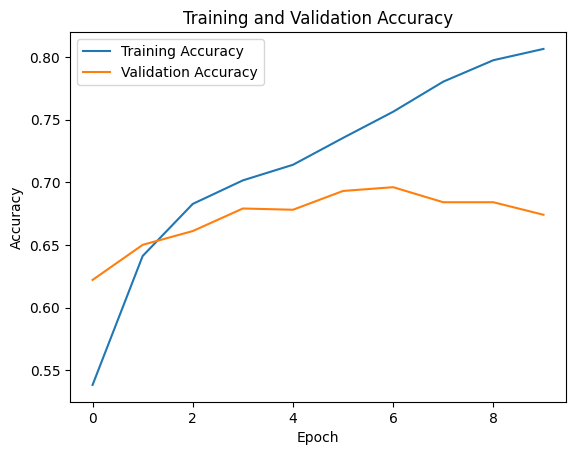

In [ ]:
#ENTER YOUR CODE HERE
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

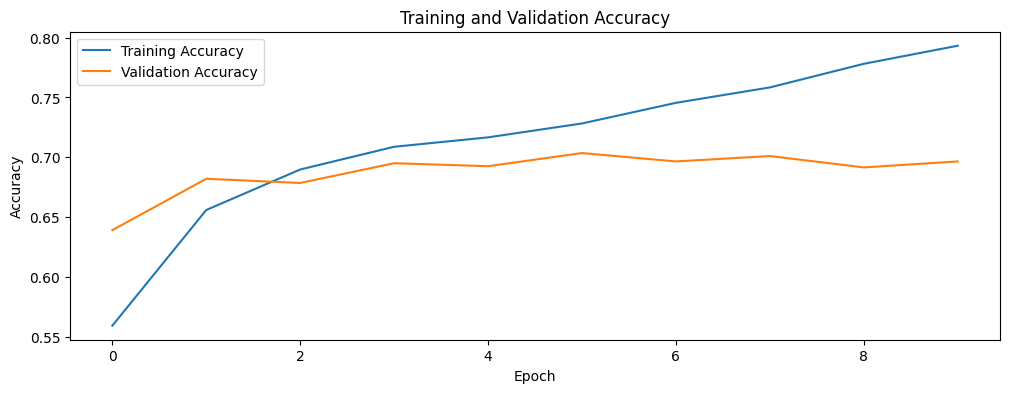

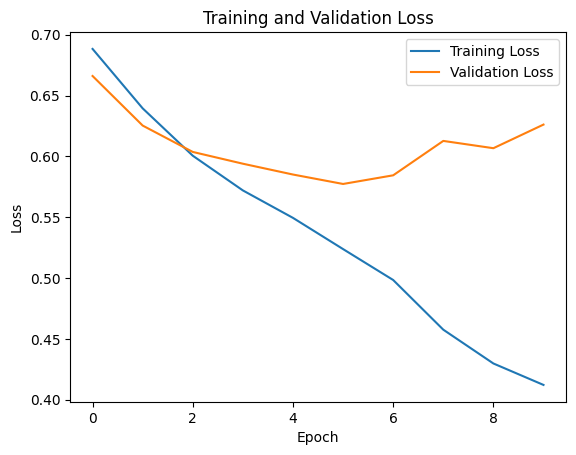

In [ ]:
#ENTER YOUR CODE HERE
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

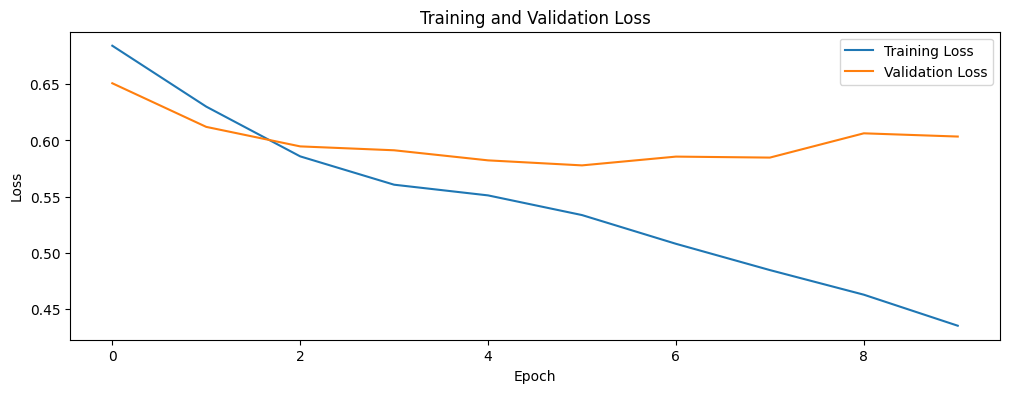

**Lets see what the accuracy of the model is.**

In [38]:
#ENTER YOUR CODE HERE
from sklearn.metrics import classification_report

predictions = model.predict(padded_test_sequences, batch_size=BATCH_SIZE)
predicted_labels = (predictions > 0.5).astype(int).flatten()

y_test_encoded= np.array(y_test_encoded)

report = classification_report(y_test_encoded, predicted_labels, target_names=['Class 0', 'Class 1'])
print(report)


1/1 [==============================] - 1s 729ms/step
              precision    recall  f1-score   support

     Class 0       0.69      0.62      0.65       492
     Class 1       0.66      0.73      0.69       508

    accuracy                           0.67      1000
   macro avg       0.68      0.67      0.67      1000
weighted avg       0.68      0.67      0.67      1000



63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1012
           1       0.68      0.73      0.70       988

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [54]:
#ENTER YOUR CODE HERE
import random

random_index = random.randint(0, len(X_test) - 1)
random_sequence = padded_test_sequences[random_index]
prediction = model.predict(random_sequence.reshape(1, -1))
predicted_sentiment = "Positive" if prediction >= 0.5 else "Negative"
print(f"The predicted sentiment is: {predicted_sentiment}")
actual_sentiment_label = 'Positive' if y_test_encoded[random_index] == 1 else 'Negative'
print(f"The original sentiment is: {actual_sentiment_label}")


1/1 [==============================] - 0s 28ms/step
The predicted sentiment is: Positive
The original sentiment is: Positive


The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  402 2498  165   91  201    5]
1/1 [==============================] - 1s 835ms/step
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
#ENTER YOUR CODE HERE
reverse_word_index = {value: key for key, value in word_index.items()}
decoded_sequence = ' '.join([reverse_word_index.get(i, '?') for i in random_sequence if i != 0])
print(f"Original text: {decoded_sequence}")

Original text: gilmor girl


['dad', 'fever', 'again', 'not', 'looking', 'good']


**We can try this on a random string as well.**

In [46]:
input_str="I hate everyone on earth!"
#ENTER YOUR CODE HERE

sequence = tokenizer.texts_to_sequences([input_str])
padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
prediction = model.predict(padded_sequence)
sentiment = "Positive" if prediction >= 0.5 else "Negative"
print(f'The predicted sentiment is: {sentiment}')

1/1 [==============================] - 0s 99ms/step
The predicted sentiment is: Negative


After removal of stopwords: 0    I hate everyone earth!
dtype: object
After removal of punctuation: 0    I hate everyone earth 
dtype: object
After stemming: 0    i hate everyone earth 
dtype: object
After tokenization: [[1, 100, 138, 2693]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  100  138 2693]]
1/1 [==============================] - 0s 58ms/step
The predicted sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## GOOD JOB!